In [2]:
from plotly.offline import init_notebook_mode
import cufflinks as cf
cf.go_offline()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
a = pd.read_csv("retail_sales.csv")
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094
...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033


In [3]:
# 1 Load the CSV and convert Date to datetime. How many rows and columns are there?
a.dtypes

Date                object
Region              object
Store               object
ProductCategory     object
ProductName         object
UnitsSold            int64
UnitPrice          float64
CostPrice          float64
CustomerID          object
dtype: object

In [4]:
a["Date"] = pd.to_datetime(a["Date"])

In [5]:
a.dtypes

Date               datetime64[ns]
Region                     object
Store                      object
ProductCategory            object
ProductName                object
UnitsSold                   int64
UnitPrice                 float64
CostPrice                 float64
CustomerID                 object
dtype: object

In [6]:
# 2. Are there any missing values or duplicate rows? If duplicates exist, how many and how will you handle them?
print(a.isnull().sum())

Date               0
Region             0
Store              0
ProductCategory    0
ProductName        0
UnitsSold          0
UnitPrice          0
CostPrice          0
CustomerID         0
dtype: int64


In [7]:
a.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool

In [8]:
#3. Verify that all numeric columns (UnitsSold, UnitPrice, CostPrice) are the correct dtype. Any non-numeric entries?
print(a[["UnitsSold", "UnitPrice", "CostPrice"]].dtypes)

UnitsSold      int64
UnitPrice    float64
CostPrice    float64
dtype: object


In [9]:
# 4. Flag any rows where UnitPrice is less than the CostPrice (sold below cost). How many such cases?
a["UnitPrice"] < a["CostPrice"]

0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool

In [10]:
#5. Create the revenue column
a["Revenue"] = " "
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,
...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,


In [11]:
a["Revenue"] = a["UnitsSold"] * a["UnitPrice"]
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90
...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24


In [12]:
# 6. Create the COGS column (cost of goods sold)
a["COGS"] = " "
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,
...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,


In [13]:
a["COGS"] = a["UnitsSold"] * a["CostPrice"]
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90
...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64


In [14]:
# 7. Extract the Year, Month, Week from the Date column
a["Year"] = " "
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15,
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03,
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90,
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56,
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36,
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48,
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64,


In [15]:
a["Year"] = a["Date"].dt.year
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15,2024
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03,2024
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,2024
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56,2024
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36,2024
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48,2024
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64,2024


In [16]:
a["Month"] = " "
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year,Month
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15,2024,
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03,2024,
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024,
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,2024,
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90,2024,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56,2024,
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36,2024,
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48,2024,
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64,2024,


In [17]:
a["Month"] = a["Date"].dt.month
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year,Month
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15,2024,2
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03,2024,4
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024,5
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,2024,4
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90,2024,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56,2024,5
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36,2024,5
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48,2024,4
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64,2024,2


In [18]:
a["Week"] = " "
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year,Month,Week
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15,2024,2,
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03,2024,4,
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024,5,
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,2024,4,
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90,2024,4,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56,2024,5,
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36,2024,5,
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48,2024,4,
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64,2024,2,


In [19]:
a["Week"] = a["Date"].dt.isocalendar().week
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year,Month,Week
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15,2024,2,6
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03,2024,4,17
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024,5,19
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,2024,4,14
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90,2024,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56,2024,5,22
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36,2024,5,21
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48,2024,4,17
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64,2024,2,7


In [20]:
# 8. Create GrossProfit column
a["GrossProfit"]= " "
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year,Month,Week,GrossProfit
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15,2024,2,6,
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03,2024,4,17,
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024,5,19,
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,2024,4,14,
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90,2024,4,16,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56,2024,5,22,
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36,2024,5,21,
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48,2024,4,17,
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64,2024,2,7,


In [21]:
a["GrossProfit"] = a["Revenue"] - a["COGS"]
a

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year,Month,Week,GrossProfit
0,2024-02-10,West,Store B,Furniture,Chair,15,1082.26,619.41,C1004,16233.90,9291.15,2024,2,6,6942.75
1,2024-04-24,East,Store C,Furniture,Chair,13,47.03,34.31,C1084,611.39,446.03,2024,4,17,165.36
2,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024,5,19,3601.80
3,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,2024,4,14,4065.80
4,2024-04-18,East,Store B,Electronics,Smartphone,10,1944.59,1195.29,C1094,19445.90,11952.90,2024,4,16,7493.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-05-31,North,Store A,Furniture,Sofa,18,1209.97,734.92,C1073,21779.46,13228.56,2024,5,22,8550.90
116,2024-05-26,West,Store C,Electronics,Laptop,4,1740.81,1513.09,C1021,6963.24,6052.36,2024,5,21,910.88
117,2024-04-27,East,Store B,Electronics,Laptop,19,524.65,464.92,C1085,9968.35,8833.48,2024,4,17,1134.87
118,2024-02-18,North,Store D,Electronics,Headphones,16,1414.64,1112.79,C1033,22634.24,17804.64,2024,2,7,4829.60


In [22]:
# 9. What is the total UnitsSold, total Revenue and total Gross Profit overall?
Total_UnitsSold = a["UnitsSold"].sum()
Total_UnitsSold

1320

In [23]:
 Total_Revenue = a["Revenue"].sum()
 Total_Revenue

1337771.02

In [24]:
Total_GrossProfit = a["GrossProfit"].sum()
Total_GrossProfit

381713.45

In [25]:
# 10. Show the region with the highest revenue
b= a.groupby("Region")["Revenue"].sum().reset_index()

In [26]:
b.groupby("Region")["Revenue"].sum().reset_index()
b.iplot(kind="pie",labels="Region",values="Revenue",
        title="TOTAL REVENUE BY REGION")
    

In [27]:
#11 Which store has the highest GrossProfit
a.groupby("Store")["GrossProfit"].sum().reset_index()

,Store,GrossProfit
0,Store A,101311.71
1,Store B,136224.48
2,Store C,81331.07
3,Store D,62846.19


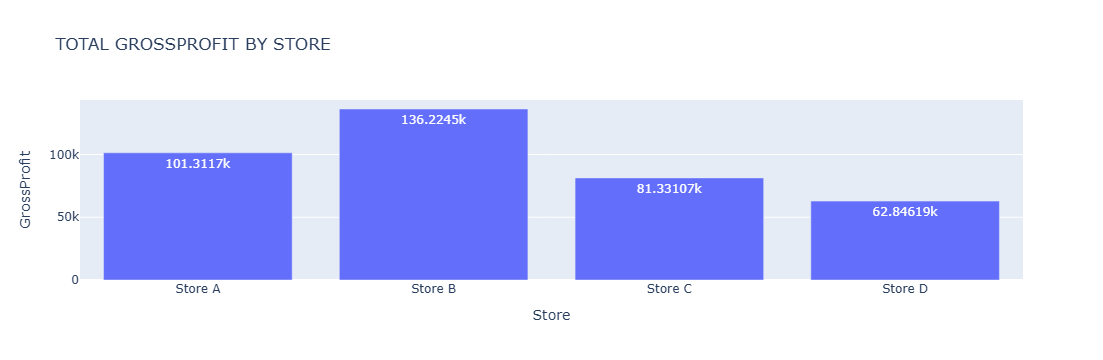

In [49]:
e= a.groupby("Store")["GrossProfit"].sum().reset_index()
px.bar(e, x="Store",y="GrossProfit",text ="GrossProfit",
    title="TOTAL GROSSPROFIT BY STORE",
    text_auto=True)

In [29]:
#12. Show the ProductCategory sells the most units?
c= a.groupby("ProductCategory")["UnitsSold"].sum().reset_index()
c

,ProductCategory,UnitsSold
0,Clothing,290
1,Electronics,286
2,Furniture,421
3,Groceries,323


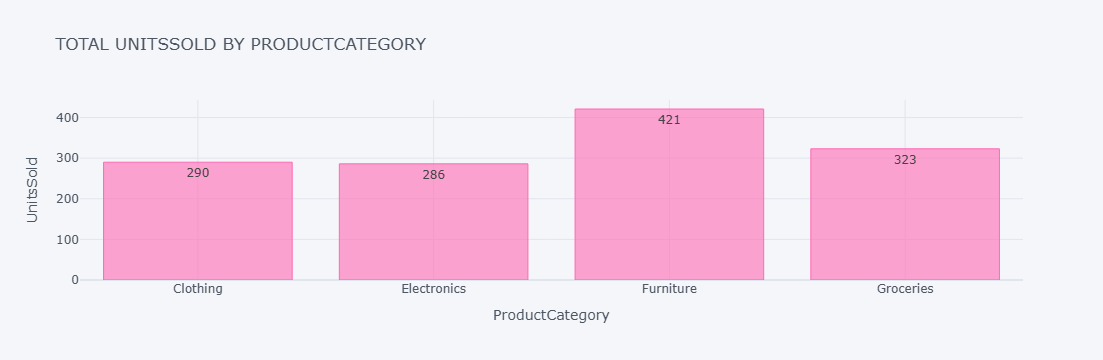

In [30]:
c= a.groupby(["ProductCategory"])["UnitsSold"].sum().reset_index()
c.iplot(kind="bar",x="ProductCategory",y="UnitsSold",text="UnitsSold",color="hotpink",
        title="TOTAL UNITSSOLD BY PRODUCTCATEGORY",
        yaxis_title= "UnitsSold", xaxis_title="ProductCategory")

In [31]:
# 13. Show the ProductCategory that  generates the most Revenue?
a.groupby("ProductCategory")["Revenue"].sum().reset_index()

,ProductCategory,Revenue
0,Clothing,306102.11
1,Electronics,312824.58
2,Furniture,419617.93
3,Groceries,299226.40


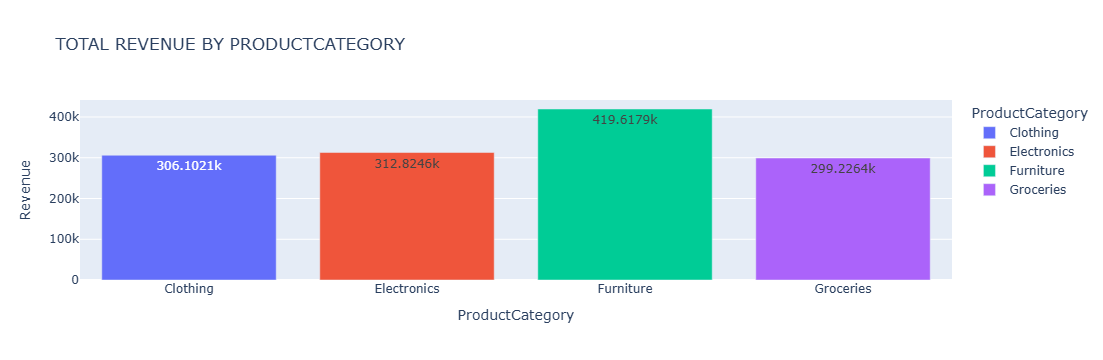

In [51]:
f= a.groupby("ProductCategory")["Revenue"].sum().reset_index()
px.bar(f, x="ProductCategory",y="Revenue",text ="Revenue",
    title="TOTAL REVENUE BY PRODUCTCATEGORY",color="ProductCategory",
    text_auto=True)

In [32]:
# 14. Identify the top 10 transactions by Revenue
a.sort_values("Revenue", ascending=False).head(10).reset_index(drop=True)

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year,Month,Week,GrossProfit
0,2024-04-03,North,Store A,Furniture,Sofa,19,1773.06,1359.11,C1066,33688.14,25823.09,2024,4,14,7865.05
1,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024,5,19,3601.80
2,2024-04-24,North,Store A,Furniture,Sofa,15,1809.33,1119.64,C1003,27139.95,16794.60,2024,4,17,10345.35
3,2024-03-28,North,Store B,Electronics,Laptop,19,1402.48,1098.82,C1023,26647.12,20877.58,2024,3,13,5769.54
4,2024-06-02,West,Store B,Groceries,Bread,16,1653.22,861.09,C1041,26451.52,13777.44,2024,6,22,12674.08
5,2024-04-02,West,Store A,Groceries,Rice,20,1289.11,1085.82,C1073,25782.20,21716.40,2024,4,14,4065.80
6,2024-03-26,East,Store D,Groceries,Bread,13,1970.03,1252.83,C1089,25610.39,16286.79,2024,3,13,9323.60
7,2024-03-12,East,Store C,Clothing,Jacket,12,1987.31,1166.68,C1084,23847.72,14000.16,2024,3,11,9847.56
8,2024-03-11,East,Store B,Furniture,Bed,17,1393.77,1241.14,C1032,23694.09,21099.38,2024,3,11,2594.71
9,2024-01-08,West,Store B,Clothing,Jacket,17,1375.26,895.52,C1076,23379.42,15223.84,2024,1,2,8155.58


In [33]:
# 15. How many unique customers are there?
a["CustomerID"].nunique()

73

In [34]:
# 16. Who are the top 5 customers by total Revenue? What share of total Revenue do they represent?
Top_Customer = a.sort_values("Revenue", ascending=False).head(5).reset_index(drop=True)
Top_Customer

,Date,Region,Store,ProductCategory,ProductName,UnitsSold,UnitPrice,CostPrice,CustomerID,Revenue,COGS,Year,Month,Week,GrossProfit
0,2024-04-03,North,Store A,Furniture,Sofa,19,1773.06,1359.11,C1066,33688.14,25823.09,2024,4,14,7865.05
1,2024-05-12,East,Store C,Electronics,Smartphone,18,1703.11,1503.01,C1057,30655.98,27054.18,2024,5,19,3601.80
2,2024-04-24,North,Store A,Furniture,Sofa,15,1809.33,1119.64,C1003,27139.95,16794.60,2024,4,17,10345.35
3,2024-03-28,North,Store B,Electronics,Laptop,19,1402.48,1098.82,C1023,26647.12,20877.58,2024,3,13,5769.54
4,2024-06-02,West,Store B,Groceries,Bread,16,1653.22,861.09,C1041,26451.52,13777.44,2024,6,22,12674.08


In [35]:
#16b What share of total Revenue do they represent?
Top_Customers_Share = (Top_Customer["Revenue"] /  Total_Revenue) * 100
Top_Customers_Share

0    2.518229
1    2.291572
2    2.028744
3    1.991904
4    1.977283
Name: Revenue, dtype: float64

In [36]:
# 17. For each customer, how many distinct ProductCategories have they purchased? List customers with purchases across ≥3 categories.
Customers = a.groupby("CustomerID")["ProductCategory"].nunique().reset_index(name="DistinctCategories")
Customers

,CustomerID,DistinctCategories
0,C1000,2
1,C1002,1
2,C1003,2
3,C1004,1
4,C1005,1
...,...,...
68,C1095,1
69,C1097,2
70,C1098,1
71,C1099,2


In [37]:
#17b List customers with purchases across ≥3 categories 
Customers["DistinctCategories"] = Customers["DistinctCategories"].astype(int)

In [38]:
Customer_Categories =[Customers["DistinctCategories"] >= 3]
Customer_Categories

[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 68    False
 69    False
 70    False
 71    False
 72    False
 Name: DistinctCategories, Length: 73, dtype: bool]

In [39]:
# 18. Create a monthly Revenue series. Which month has the highest Revenue
Monthly_Revenue = a.groupby(a['Date'].dt.to_period('M'))['Revenue'].sum().reset_index()
Monthly_Revenue

,Date,Revenue
0,2024-01,108951.84
1,2024-02,192741.52
2,2024-03,252691.62
3,2024-04,299855.38
4,2024-05,213760.45
5,2024-06,269770.21


In [40]:
# Which month has the highest Revenue
Max_month = Monthly_Revenue.max()
Max_month

Date         2024-06
Revenue    299855.38
dtype: object

In [41]:
Max_month = Monthly_Revenue.loc[Monthly_Revenue['Revenue'].idxmax()]
Max_month

Date         2024-04
Revenue    299855.38
Name: 3, dtype: object

C:\Users\DELL\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

PeriodIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



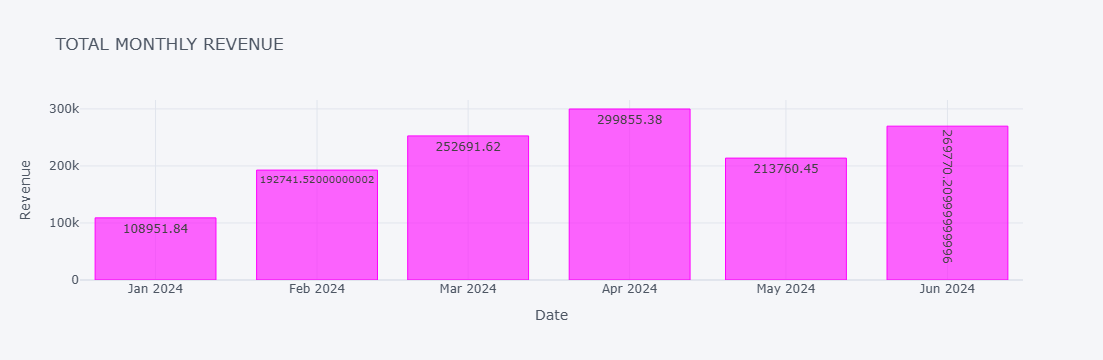

In [52]:
Monthly_Revenue = a.groupby(a['Date'].dt.to_period('M'))['Revenue'].sum().reset_index()
Monthly_Revenue
Monthly_Revenue.iplot(kind="bar",x="Date",y="Revenue",text="Revenue",color="magenta",
title = "TOTAL MONTHLY REVENUE",
yaxis_title= "Revenue", xaxis_title="Date")

In [43]:
import plotly.express as px

In [44]:
#19. Plot (or compute) a weekly trend of UnitsSold. Any noticeable spikes? Which week ranks #1?
# Group by week and sum UnitsSold
d= a.groupby(["Week"])["UnitsSold"].sum().reset_index()
px.line(d, x="Week",y="UnitsSold", markers=True, text ="UnitsSold",
    title="WEEKLY TREND OF UNITS SOLD",
    line_shape="linear")

In [46]:
#20. Compute MoM growth in Revenue.
mom_growth =  Monthly_Revenue.pct_change()*100
mom_growth

TypeError: cannot perform __truediv__ with this index type: PeriodArray